In [1]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go
from scipy.stats import norm
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [2]:
output_path = "/data/projects/PSB/Output/nonTATA"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [3]:
chr_list = list(range(1, 23)) + ['X', 'Y']

In [4]:
chr_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 'X',
 'Y']

In [5]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [6]:
df_dict = {}
df_list = []
for chr_name in chr_list:
    print(chr_name)
    base_dir = "/data/projects/PSB/DNABERT_data/CoreProm/chr"+str(chr_name)
    concat_probab = np.load(base_dir+"/nonTATA/Prediction_result/pred_results.npy")
    print(len(concat_probab))
    print(base_dir.split())
    df = pd.read_csv(base_dir+"/all_data.tsv", sep= "\t")
    print(df.shape)
    Reference_probab = concat_probab[::2]
    Alternative_probab = concat_probab[1::2]
    df['Ref_probab']=Reference_probab
    df['Alt_probab']=Alternative_probab
    df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
    df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)
    df_list.append(df)

1
17155560
['/data/projects/PSB/DNABERT_data/CoreProm/chr1']
(8577780, 12)
2
21011660
['/data/projects/PSB/DNABERT_data/CoreProm/chr2']
(10505830, 12)
3
19096864
['/data/projects/PSB/DNABERT_data/CoreProm/chr3']
(9548432, 12)
4
10303162
['/data/projects/PSB/DNABERT_data/CoreProm/chr4']
(5151581, 12)
5
11383010
['/data/projects/PSB/DNABERT_data/CoreProm/chr5']
(5691505, 12)
6
14330936
['/data/projects/PSB/DNABERT_data/CoreProm/chr6']
(7165468, 12)
7
11537934
['/data/projects/PSB/DNABERT_data/CoreProm/chr7']
(5768967, 12)
8
13183080
['/data/projects/PSB/DNABERT_data/CoreProm/chr8']
(6591540, 12)
9
7532658
['/data/projects/PSB/DNABERT_data/CoreProm/chr9']
(3766329, 12)
10
8363644
['/data/projects/PSB/DNABERT_data/CoreProm/chr10']
(4181822, 12)
11
16503994
['/data/projects/PSB/DNABERT_data/CoreProm/chr11']
(8251997, 12)
12
12433622
['/data/projects/PSB/DNABERT_data/CoreProm/chr12']
(6216811, 12)
13
4592298
['/data/projects/PSB/DNABERT_data/CoreProm/chr13']
(2296149, 12)
14
10498688
['/data

In [40]:
concatenated_df = pd.concat(df_list)

In [41]:
concatenated_df.shape

(130735533, 16)

In [42]:
concatenated_df.head()

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,chr1,-,24413681-24413770,ENST00000498488,24391258-24416153,rs1643864567,24413681,24413682,G,A,GTCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,ATCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,0.463305,0.239190,-0.103833,1.457238
1,chr1,-,24413681-24413770,ENST00000498488,24391258-24416153,rs1643864567,24413681,24413682,G,C,GTCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,CTCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,0.463305,0.541101,0.042096,-0.449865
2,chr1,-,24413681-24413770,ENST00000498488,24391258-24416153,rs1643864776,24413684,24413685,C,A,GTCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,GTCACGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,0.463305,0.289088,-0.080716,1.086023
3,chr1,-,24413681-24413770,ENST00000498488,24391258-24416153,rs927682595,24413685,24413686,C,G,GTCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,GTCCGGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,0.463305,0.291404,-0.079642,1.069798
4,chr1,-,24413681-24413770,ENST00000498488,24391258-24416153,rs927682595,24413685,24413686,C,T,GTCCCGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,GTCCTGGCAGCTGAATCTGGCCAGCCCAACCTCCCGGTCGCTATGG...,0.463305,0.321068,-0.065899,0.868246


In [43]:
len(concatenated_df['Donor_coordinates'].unique())

207792

In [44]:
len(concatenated_df['dbsnp_id'].unique())

5649618

In [45]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
filtered_df1 = concatenated_df[(concatenated_df['Ref_probab'] > 0.5) & (concatenated_df['Alt_probab'] < 0.5)]
filtered_df2 = concatenated_df[(concatenated_df['Ref_probab'] < 0.5) & (concatenated_df['Alt_probab'] > 0.5)]
df_interest = pd.concat([filtered_df1, filtered_df2])
df_interest

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
274,chr1,+,24415758-24415847,ENST00000488155,24415812-24420128,rs6666172,24415772,24415773,G,T,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,CGCGACCTTTGAAATCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,0.633146,0.466665,-0.105407,0.979990
286,chr1,+,24415758-24415847,ENST00000488155,24415812-24420128,rs1406830558,24415783,24415784,C,T,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,CGCGACCTTTGAAAGCAAAACACTGTAGCATCTTGGCAGCTCTGAA...,0.633146,0.368558,-0.167523,1.564094
290,chr1,+,24415758-24415847,ENST00000488155,24415812-24420128,rs975032527,24415792,24415793,G,C,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTCGCAGCTCTGAA...,0.633146,0.497665,-0.085779,0.800807
306,chr1,+,24415758-24415847,ENST00000488155,24415812-24420128,rs1335040726,24415828,24415829,G,A,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,0.633146,0.333326,-0.189830,1.787379
323,chr1,+,24415758-24415847,ENST00000492753,24414911-24416595,rs6666172,24415772,24415773,G,T,CGCGACCTTTGAAAGCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,CGCGACCTTTGAAATCAAAACACTGCAGCATCTTGGCAGCTCTGAA...,0.633146,0.466665,-0.105407,0.979990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,chrY,-,13359743-13359832,ENST00000682112,13234599-13480002,rs779580259,13359812,13359813,C,A,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.559943,0.073835,-0.765514
17724,chrY,-,13359743-13359832,ENST00000684226,13234580-13359787,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242
17729,chrY,-,13359743-13359832,ENST00000684226,13234580-13359787,rs779580259,13359812,13359813,C,A,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.559943,0.073835,-0.765514
17733,chrY,-,13359743-13359832,ENST00000682913,13249856-13479665,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242


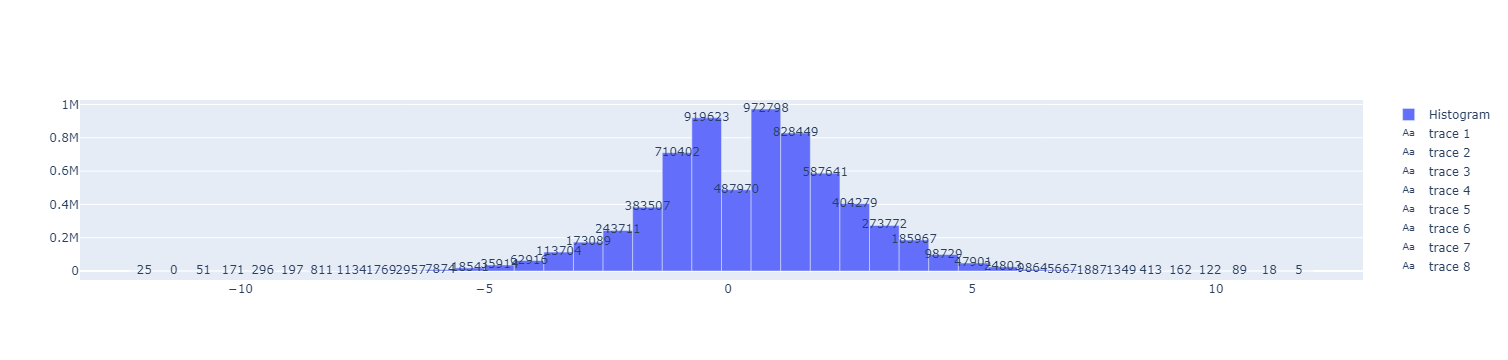

In [46]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

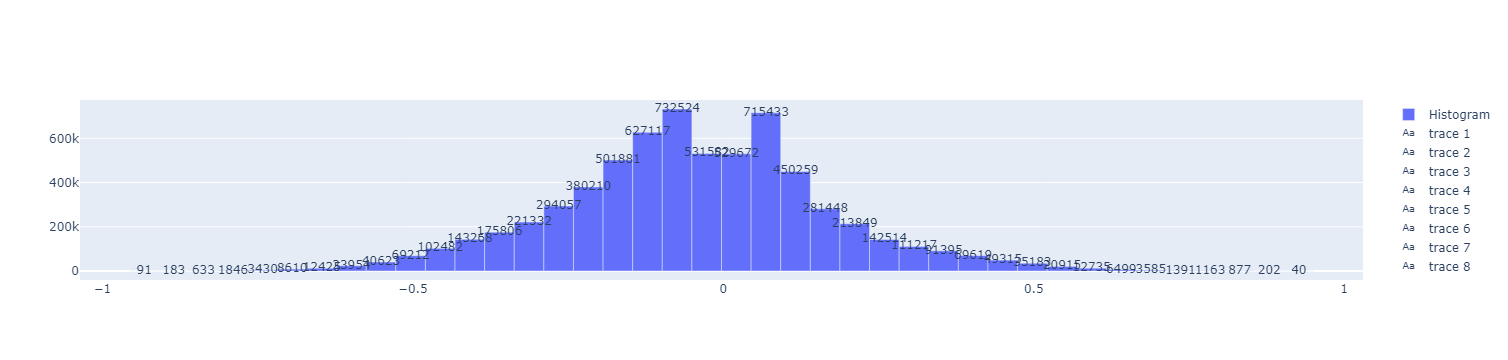

In [47]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [48]:
df_interest = df_interest[(df_interest['ScoreChange']>0.25)|(df_interest['ScoreChange']<-0.25)]
df_interest

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
801,chr1,+,209583672-209583761,ENST00000009105,209583717-209613938,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381
802,chr1,+,209583672-209583761,ENST00000009105,209583717-209613938,rs1439681836,209583697,209583698,A,G,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATTGTTAAAGCGCTGGAGCAGCTAATCCTCAC...,0.875770,0.497734,-0.331072,2.830614
816,chr1,+,209583672-209583761,ENST00000361322,209583714-209613939,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381
817,chr1,+,209583672-209583761,ENST00000361322,209583714-209613939,rs1439681836,209583697,209583698,A,G,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATTGTTAAAGCGCTGGAGCAGCTAATCCTCAC...,0.875770,0.497734,-0.331072,2.830614
831,chr1,+,209583672-209583761,ENST00000423146,209583729-209609913,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,chrY,-,13359743-13359832,ENST00000624098,13249856-13479665,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242
17706,chrY,-,13359743-13359832,ENST00000682216,13234577-13479969,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242
17715,chrY,-,13359743-13359832,ENST00000682112,13234599-13480002,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242
17724,chrY,-,13359743-13359832,ENST00000684226,13234580-13359787,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242


In [49]:
df_interest['variant_length'] = df_interest['variant_end']-df_interest['varinat_start']
df_interest

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,variant_length
801,chr1,+,209583672-209583761,ENST00000009105,209583717-209613938,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381,1
802,chr1,+,209583672-209583761,ENST00000009105,209583717-209613938,rs1439681836,209583697,209583698,A,G,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATTGTTAAAGCGCTGGAGCAGCTAATCCTCAC...,0.875770,0.497734,-0.331072,2.830614,1
816,chr1,+,209583672-209583761,ENST00000361322,209583714-209613939,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381,1
817,chr1,+,209583672-209583761,ENST00000361322,209583714-209613939,rs1439681836,209583697,209583698,A,G,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATTGTTAAAGCGCTGGAGCAGCTAATCCTCAC...,0.875770,0.497734,-0.331072,2.830614,1
831,chr1,+,209583672-209583761,ENST00000423146,209583729-209609913,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,chrY,-,13359743-13359832,ENST00000624098,13249856-13479665,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1
17706,chrY,-,13359743-13359832,ENST00000682216,13234577-13479969,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1
17715,chrY,-,13359743-13359832,ENST00000682112,13234599-13480002,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1
17724,chrY,-,13359743-13359832,ENST00000684226,13234580-13359787,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1


In [50]:
#df_interest['Z_Score'] = stats.zscore(df['LogOddRatio'])
df_interest = df_interest[df_interest['variant_length']<=3]
df_interest

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,variant_length
801,chr1,+,209583672-209583761,ENST00000009105,209583717-209613938,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381,1
802,chr1,+,209583672-209583761,ENST00000009105,209583717-209613938,rs1439681836,209583697,209583698,A,G,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATTGTTAAAGCGCTGGAGCAGCTAATCCTCAC...,0.875770,0.497734,-0.331072,2.830614,1
816,chr1,+,209583672-209583761,ENST00000361322,209583714-209613939,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381,1
817,chr1,+,209583672-209583761,ENST00000361322,209583714-209613939,rs1439681836,209583697,209583698,A,G,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATTGTTAAAGCGCTGGAGCAGCTAATCCTCAC...,0.875770,0.497734,-0.331072,2.830614,1
831,chr1,+,209583672-209583761,ENST00000423146,209583729-209609913,rs1185466806,209583688,209583689,T,C,CTTTAATTGGGTTTATTGTTAAAGCACTGGAGCAGCTAATCCTCAC...,CTTTAATTGGGTTTATCGTTAAAGCACTGGAGCAGCTAATCCTCAC...,0.875770,0.466460,-0.358461,3.011381,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17697,chrY,-,13359743-13359832,ENST00000624098,13249856-13479665,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1
17706,chrY,-,13359743-13359832,ENST00000682216,13234577-13479969,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1
17715,chrY,-,13359743-13359832,ENST00000682112,13234599-13480002,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1
17724,chrY,-,13359743-13359832,ENST00000684226,13234580-13359787,rs1402517404,13359793,13359794,C,T,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,AATATACTATTTAAAATTTTTACCTGTAGAAATTTAATTCTTGCAG...,0.428082,0.794773,0.291436,-2.371242,1


In [51]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

1.2299940692595763 3.2141714058090076


In [52]:
# z_score, p_value = ztest(x1= df_interest['LogOddRatio'], value = mean)

-3.3219280948873626 3.3219280948873626


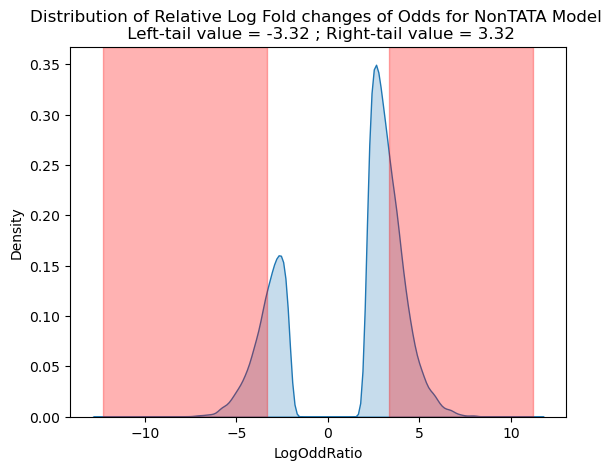

In [53]:
#print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


# print(z_critical)
#x1, x2 = mean + 3*std, mean - 3*std
x1= 3.3219280948873626
x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')

plt.title(f'Distribution of Relative Log Fold changes of Odds for NonTATA Model \n Left-tail value = {x2:.2f} ; Right-tail value = {x1:.2f}')
plt.savefig('NonTATA_LogOddRatio_Distribution.png')
plt.show()

In [54]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)]

In [55]:
df_selected

,chr,strand,Donor_coordinates,Ensemble_Transcript_ID,Transcript_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio,variant_length
859,chr1,+,27726012-27726101,ENST00000234549,27726028-27760581,rs899932152,27726014,27726015,G,A,GTGCCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,GTACCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,0.844356,0.222337,-0.525205,4.245996,1
910,chr1,+,27726012-27726101,ENST00000010299,27726057-27760581,rs899932152,27726014,27726015,G,A,GTGCCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,GTACCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,0.844356,0.222337,-0.525205,4.245996,1
961,chr1,+,27726012-27726101,ENST00000373954,27725961-27763116,rs899932152,27726014,27726015,G,A,GTGCCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,GTACCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,0.844356,0.222337,-0.525205,4.245996,1
1012,chr1,+,27726012-27726101,ENST00000373949,27726028-27761964,rs899932152,27726014,27726015,G,A,GTGCCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,GTACCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,0.844356,0.222337,-0.525205,4.245996,1
1063,chr1,+,27726012-27726101,ENST00000419687,27725996-27761473,rs899932152,27726014,27726015,G,A,GTGCCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,GTACCTCAGACTGTCAGATAAATCGGcgggccgggccggcgggtcg...,0.844356,0.222337,-0.525205,4.245996,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7600,chrY,-,19484840-19484929,ENST00000441139,19455431-19503153,rs2045065728,19484855,19484856,G,A,CAGTGCTTCCAGGCCGTCAATCTGATAAGCCAATTTGCATCCACCT...,CAGTGCTTCCAGGCCATCAATCTGATAAGCCAATTTGCATCCACCT...,0.367663,0.909937,0.493435,-4.119065,1
7603,chrY,-,19484840-19484929,ENST00000513194,19456585-19484884,rs2045065728,19484855,19484856,G,A,CAGTGCTTCCAGGCCGTCAATCTGATAAGCCAATTTGCATCCACCT...,CAGTGCTTCCAGGCCATCAATCTGATAAGCCAATTTGCATCCACCT...,0.367663,0.909937,0.493435,-4.119065,1
7606,chrY,-,19484840-19484929,ENST00000650676,19456394-19567092,rs2045065728,19484855,19484856,G,A,CAGTGCTTCCAGGCCGTCAATCTGATAAGCCAATTTGCATCCACCT...,CAGTGCTTCCAGGCCATCAATCTGATAAGCCAATTTGCATCCACCT...,0.367663,0.909937,0.493435,-4.119065,1
9590,chrY,-,19260831-19260920,ENST00000615809,19253960-19260875,rs2044894623,19260883,19260884,C,T,TATACTACCAGTAAGGGAGTGAGTATAAAAACCAGCAGCAGCAGGA...,TATACTACCAGTAAGGGAGTGAGTATAAAAACCAGCAGCAGCAGGA...,0.063530,0.657990,0.391149,-4.825759,1


In [56]:
len(df_selected['dbsnp_id'].unique())

42533

In [57]:
len(df_selected['Donor_coordinates'].unique())

30420

In [58]:
df_selected.to_csv(output_path+"/nonTATA_candidates.tsv", sep= "\t", index=False)
# Save to a .tsv file
np.savetxt(output_path+"/Unique_DBSNP_0.05_Percentile.tsv", df_selected['dbsnp_id'].unique(), delimiter="\t", fmt='%s')
np.savetxt(output_path+"/Unique_nonTATA_Core_promoter.tsv", df_selected['Donor_coordinates'].unique(), delimiter="\t", fmt='%s')

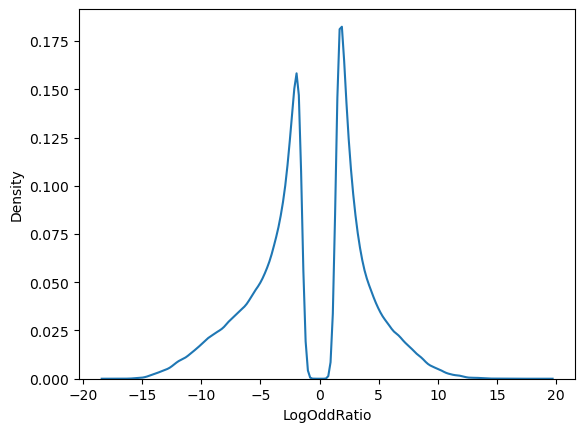

In [80]:
sns.kdeplot(df_interest['LogOddRatio'])
plt.show()


In [26]:
df_interest['reference_seq'].unique()

array(['GAGTGGAGCACTGTACATACCTGGCTGGATTGAGAATGGTAAGTAATTTGTAATAACATACCTGGCTTGTGCAAAAGCA',
       'AGATTTCACCTCTGCAAATATGAGAGATTCTGCAGAAGGTAAGCTTGTGATATTGGCTTGGTCTGAATTGGGTGTGTAT',
       'CTGGGTAATGCTGGTCACCAGCCTTGTGGCCCTTCAAGGTATGTCCAAAAGAGCCGTAAGCACCCCAAGCAATGAGGGT',
       'CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA',
       'TCTCTCAGTGGTCGCTATCTGGAGGAGCTTAGCCAAAGGTAAGCTTTATTATGAATTAGCACAGTCAGCTTCACACAGT',
       'TCTGACCAGTGCTGCTGTGACGAATCTTTCAGTTACAGGTAAGCAGCTGCCAGGCCATGCACCTGCTGAGCACATGGGA',
       'GCTGAAAAATATTATGGCAACAAATGCATTATTCCATGGTAAGATACGTCTCATTATTGGAGTGTGTCTGAACATATAT',
       'CAGTATCTGATTTCCACCCAGTCAAAAAAATTGTCCAGGTAAGCACAATATCCCTATTTATTTTCAGTCCTACCTCAAG',
       'TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT',
       'TCACATCCATCAGAGGATTGCTGATCACTCTTACCAAGGTATGTTTTATCACAGTGTTAAAAAGTACTGCTTATCATTT',
       'AACCAAATTTATATCTGCTTGGAACAACATGAAATATAGTAAGTATCATGTTTTAAAAATTGTATAAATCCAAAGAAAT',
       'AC

In [27]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide',  'reference_seq']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide     reference_seq                                                                  
rs1057516984  TT                              TTT                         TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT     7
rs10626387    T                               TCT                         AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs10668386    .                               TC                          AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs1158710364  TA                              TATA                        CTAACCATCATATTTAGAACCAGCTGTTTACCAGAGTGGTAAGTTGGATTGTGTTTTATTTTGGTTTTTATTCTTCATT     2
rs1172687424  G                               T                           CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA     5
rs1197477113  .                               

In [28]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide   
rs1057516984  TT                              TTT                            7
rs10626387    T                               TCT                           15
rs10668386    .                               TC                            15
rs1158710364  TA                              TATA                           2
rs1172687424  G                               T                              5
rs1197477113  .                               AG                             6
rs1202559184  .                               CG                             5
rs1209017757  .                               A                              1
rs1212185079  TATTAT                          TAT                            2
rs1230423427  AA                              AAA                            1
rs1289052837  .                               C                              9
rs1297116846  A                               AA          

-0.267426781822307 0.7891405811788812


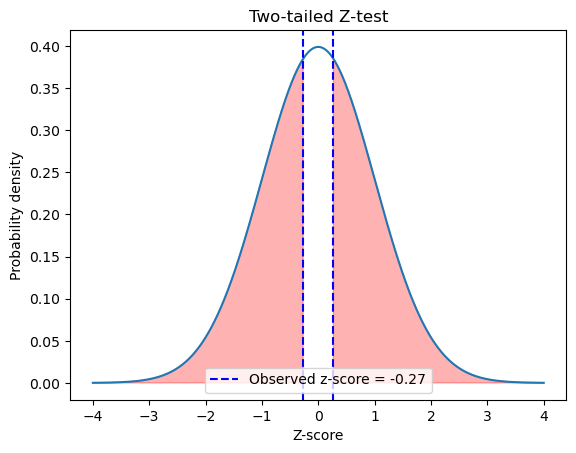

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Generate 1000 normally distributed data points
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Perform the z test
z_score, p_value = ztest(x1= s, value = mu)

print(z_score, p_value)

# # Generate data and plot the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)

# Shade the two-tail regions
plt.fill_between(x, 0, y, where=(x <= -abs(z_score)) | (x >= abs(z_score)), color='red', alpha=0.3)

# # Mark the observed value
plt.axvline(z_score, color='blue', linestyle='--', label=f'Observed z-score = {z_score:.2f}')
plt.axvline(-z_score, color='blue', linestyle='--')

plt.legend()
plt.title('Two-tailed Z-test')
plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.show()

0.0 1.0
1.959963984540054
-1.9201628731122704 1.8585445470122721


/tmp/ipykernel_237056/578947367.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/shared/software/anaconda/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




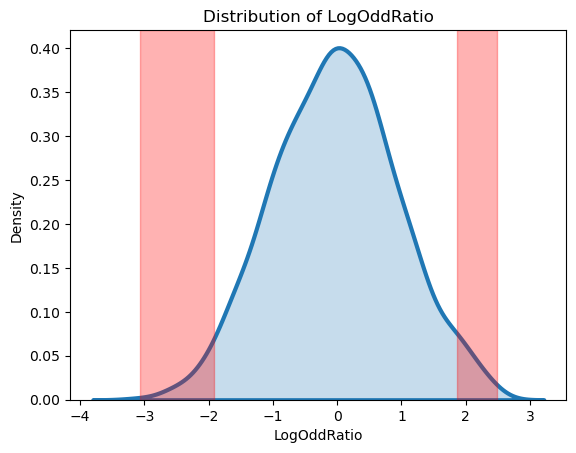

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Assume we have the following DataFrame
df = pd.DataFrame({
   'LogOddRatio': np.random.normal(0, 1, 1000)
})

# Perform the z test
z_score, p_value = ztest(x1= df['LogOddRatio'], value =  df['LogOddRatio'].mean())
print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'
sns.distplot(df['LogOddRatio'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3})

# Get the extreme values for a two tailed test at alpha = 0.05
z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


print(z_critical)
x1, x2 = df['LogOddRatio'].mean() + z_critical*df['LogOddRatio'].std(), df['LogOddRatio'].mean() - z_critical*df['LogOddRatio'].std()
print(x2, x1)
# Shade the area for the two tailed test
plt.axvspan(min(df['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df['LogOddRatio']), alpha=0.3, color='red')

plt.title('Distribution of LogOddRatio')
plt.show()
